In [45]:
import requests
import csv
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

class YouTubeCrawler():
    ## 1.每一次送出請求皆需要帶上API Key。
    def __init__(self, api_key):
        self.base_url = "https://www.googleapis.com/youtube/v3/"
        self.api_key = api_key

    ## 2.回傳資料要轉換JSON，包含用於組合網址、請求的函式，也作請求失敗的處理。
    def get_html_to_json(self, path):
        """組合 URL 後 GET 網頁並轉換成 JSON"""
        api_url = f"{self.base_url}{path}&key={self.api_key}"
        r = requests.get(api_url)
        if r.status_code == requests.codes.ok:
            data = r.json()
        else:
            data = None
        return data

    ## 7.回傳"頻道訂閱人數"。
    def getsub_count(self, channel_id, part='snippet,statistics'):
        """取得頻道上傳影片清單的ID"""
        # UC7ia-A8gma8qcdC6GDcjwsQ
        path = f'channels?part={part}&id={channel_id}'
        data = self.get_html_to_json(path)
        try:
            subCount = data['items'][0]["statistics"]["subscriberCount"]
        except KeyError:
            subCount = None
        return subCount
        # base_url = "https://www.googleapis.com/youtube/v3/channels"
        # response = requests.get(base_url)
        #
        # if response.status_code == 200:
        #     response_dict = response.json()
        #     results3_list = [response_dict["items"][0]["statistics"]["subscriberCount"]]
        # print(results3_list)

    ## 5.回傳"影片info"。
    def get_video(self, video_id, part='snippet,statistics'):
        """取得影片資訊"""
        path = f'videos?part={part}&id={video_id}'
        data = self.get_html_to_json(path)
        if not data:
            return {}

        # 以下整理並提取需要的資料
        data_item = data['items'][0]

        try:
            # 2019-09-29T04:17:05Z
            time_ = datetime.strptime(data_item['snippet']['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
        except ValueError:
            # 日期格式錯誤
            time_ = None

        url_ = f"https://www.youtube.com/watch?v={data_item['id']}"

        try:
            comment_ = data_item['statistics']['commentCount']
        except:
            # 留言停用
            comment_ = 0

        try:
            like_ = data_item['statistics']['likeCount']
        except:
            # 留言讚數
            like_ = 0
        info = {
            'id': data_item['id'],                                          # 影片ID
            'channelTitle': data_item['snippet']['channelTitle'],           # 頻道名稱
            'publishedAt': time_,                                           # 影片釋出時間
            'video_url': url_,                                              # 影片網址
            'title': data_item['snippet']['title'],                         # 影片標題
            # 'description': data_item['snippet']['description'],           # 影片描述
            'likeCount': like_,                                             # 讚數
            # 'dislikeCount': data_item['statistics']['dislikeCount'],      # 倒讚數
            'commentCount': comment_,                                       # 評論數
            'viewCount': data_item['statistics']['viewCount']               # 點閱率
        }
        f = open(f"./Predict/{data_item['id']}.jpg", 'wb')           # 封面縮圖
        response = requests.get(f"https://i.ytimg.com/vi/{data_item['id']}/0.jpg")
        f.write(response.content)
        f.close()
        return info

In [ ]:
# UCq5lbTl1VD0PLtHteglqZfA eartajehOx4
# UCq5lbTl1VD0PLtHteglqZfA e5y8xSZy2Cg
# UCq5lbTl1VD0PLtHteglqZfA Agr9NCOV01M
# UCMUnInmOkrWN4gof9KlhNmQ _IMww7gwIus
# UCMUnInmOkrWN4gof9KlhNmQ N4xXGIrzKJs

頻道名稱 ：惊悚哥
影片標題 ：被強？那就用這麼粗的鋼管強回來！全球十大禁片，《我唾棄你的墳墓》5部大合集，一口氣看完！被標一批，無奈重發
發佈時間 ：2021-09-03 04:15:00
頻道訂閱 ：608000


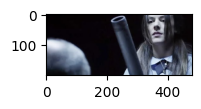

In [48]:
### Get the Channel ID: https://commentpicker.com/youtube-channel-id.php
youtube_channel_id = 'UCq5lbTl1VD0PLtHteglqZfA'
video_id = 'Agr9NCOV01M'

youtube_spider = YouTubeCrawler("Your YouTube API")
channel_subCount = youtube_spider.getsub_count(youtube_channel_id)
video_info = youtube_spider.get_video(video_id)
video_info['subscriberCount'] = channel_subCount

# predict_Title_ = '超人反常的黑暗面，用能力窥视你的老板 |《黑袍糾察隊》#102 | 回顧解析'
predict_Title_ = video_info['title']
predict_PubTime = video_info['publishedAt']
predict_Subscriber = video_info['subscriberCount']
viewCount = video_info['viewCount']

print("頻道名稱 ：" + video_info['channelTitle'])
print("影片標題 ：" + predict_Title_)
print("發佈時間 ：" + str(predict_PubTime))
print("頻道訂閱 ：" + predict_Subscriber)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(f"./Predict/{video_id}.jpg")                       # 讀取圖片
# img = cv2.imread('download_image\%s.jpg' % file_name)
img = img[80:280, 0:480]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
data_train = []
data_train.append(img)
input_train = np.array(data_train)

# plot first few images
for i in range(1):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(input_train[i])
# show the figure
plt.show()
# print(input_train.shape)

size = 128
def convert_cifar100_224pix(X):
    from PIL import Image
    import numpy as np
    X = np.reshape(X, (1, 200, 480, 3))  # 将图片转换成(m, channel,n_H,n_W)
    # X = X.transpose(0, 2, 3, 1)  # 转换成标准的矩阵(m, n_H,n_W, channel)
    X_resized = np.zeros((1,size,size,3))# 创建一个存储修改过图片分辨率的矩阵

    for i in range(0,1):
        img = X[i]
        img = Image.fromarray(img)
        img = np.array(img.resize((size,size),Image.LANCZOS))
        X_resized[i,:,:,:] = img

    # X_resized /= 255
    return X_resized

input_train = convert_cifar100_224pix(input_train)
# print(input_train[0].shape)
input_train = input_train.reshape(-1, size, size, 3).astype('float32')/255

In [49]:
#Prediction

import opencc
converter = opencc.OpenCC('s2t.json')
# Step 0: key in youtube data
predict_Title = []
word = converter.convert(predict_Title_)  #turn Simplified Chinese into Traditional Chinese
predict_Title.append(word)

#import title
sentence_list = predict_Title
print("原始標題: " , sentence_list[0])

# Step 1: word segmentation
from ckiptagger import data_utils, construct_dictionary, WS
ws = WS("./data")
word_to_weight = {
    "老高與小茉 Mr & Mrs Gao": 1,
}

dictionary = construct_dictionary(word_to_weight)

word_sentence_list = ws(
    sentence_list,
    sentence_segmentation=True,  #To consider delimiters
    segment_delimiter_set={",", "。", ":", "?", "!", ";", "【", "】", "|"},  # This is the defualt set of delimiters
    coerce_dictionary=dictionary,  # words in this dictionary are forced
)
# print("Origin word_sentence_list : ", word_sentence_list)
del ws

# Step 2: import pre_trained Word2Vec model
import gensim
from gensim.models.word2vec import Word2Vec
model = gensim.models.KeyedVectors.load_word2vec_format('pre_trained.bin',
                                                        unicode_errors='ignore',
                                                        binary=True)

# Step 3: remove meaningless words
words = []
word_rm = []

word_sentence_list_copy = word_sentence_list.copy()
for words_list in word_sentence_list_copy:
    if len(words_list) < 2:    # To deal with titles that are too short (less than 2 hyphenated words), add the word "video"
        words_list.append("影片")

    words_list_copy = words_list.copy()
    for e in words_list_copy:
        if len(e) < 2:          # remove conjunction
            words_list.remove(e)
            word_rm.append(e)
        elif len(e) > 6:        # remove the words that are too long
            words_list.remove(e)
            word_rm.append(e)
        elif e[0] == ' ' or e[-1] == ' ':
            words_list.remove(e)
            word_rm.append(e)


# Step 4: remove the word that don't exist in the word2vector pre-trained model
word_notInModel = []
for words_list in word_sentence_list:
    words_list_copy = words_list.copy()
    for w in words_list_copy:
        try:
            model[w]
        except:
            words_list.remove(w)
            word_notInModel.append(w)

#After processing the data, save it in word_sentence_list, and go to the next step

print("自然語言處理： " , word_sentence_list[0])

#turn the title into word2vector and save in docu_array
import numpy as np
zero_array = np.zeros(100)

for i in range(0 , len(word_sentence_list)):
    try:
        if i == 0:
            docu_array = np.mean(model[word_sentence_list[i]] , axis=0)
        else:
            docu_array = np.vstack((docu_array , np.mean(model[word_sentence_list[i]] , axis=0) ))

    except KeyError as e:
        print(repr(e))

#reshape the docu_array to the data structure that we can use
docu2=docu_array.reshape((1,1,100))

import statistics
import time
import numpy as np

predict_PubTime = str(predict_PubTime)
predict_Subscriber = int(predict_Subscriber)

times = predict_PubTime # The format of time is str
sub = predict_Subscriber

#When we deal with the data that for training model, i had standardized the time, so when i want to predict new target, the time of the prediction should also be standardized.
#statistics.stdev(timelist)=55128744 statistics.mean(timelist)=89176696
#Time
std=55128744
mean=89176696

#process time's value into Numerical value
struct_time = time.strptime("2022-12-18 22:00:00", "%Y-%m-%d %H:%M:%S")
time_stop = int(time.mktime(struct_time))
time_ord = time.strptime(times, "%Y-%m-%d %H:%M:%S")
time_now = int(time.mktime(time_ord))
timetonow = time_stop - time_now

time_arr = np.array((timetonow-mean)*10/std)
timedata=time_arr.reshape((1,1,1))

x_label=np.append(docu2, timedata, axis = 2 )

#subscriber
#When we deal with the subscribers data for training model, we let the number of subscribers divide by 100000, to make the word2vector, time, and subscriber data could in a similar range of values.
sub /= 100000
subarray=np.array(sub)
subdata=subarray.reshape((1,1,1))
x_label=np.append(x_label, subdata, axis = 2 )


from tensorflow.keras.models import load_model
model_m = load_model('Merged-1.9.h5') # load model
prediction_m = model_m.predict([input_train, x_label])
prediction_m = (2**(prediction_m-1))*timetonow*predict_Subscriber
delV_m = abs(int(viewCount)-int(prediction_m))

model_CNN = load_model('BO-6.64.h5') # load model
prediction_CNN = model_CNN.predict(input_train)
prediction_CNN = (2**(prediction_CNN-1))*timetonow*predict_Subscriber
delV_CNN = abs(int(viewCount)-int(prediction_CNN))

model_LSTM = load_model('LSTM-1.94.h5') # load model
prediction_LSTM = model_LSTM.predict(x_label)
prediction_LSTM = (2**(prediction_LSTM-1))*timetonow*predict_Subscriber
delV_LSTM = abs(int(viewCount)-int(prediction_LSTM))

print()
print("頻道名稱 ：" + video_info['channelTitle'])
print("影片標題 ：" + predict_Title_)
print("發佈時間 ：" + str(predict_PubTime))
print("頻道訂閱 ：" + str(predict_Subscriber))
print("真實點閱 : " + str(int(viewCount)))
print("預測點閱(Multimodal) : " + str(int(prediction_m)))
print("Accuracy : {:4.1f}%".format( ((1-( delV_m / max(int(prediction_m), int(viewCount)) ))*100) )) #the Accuracy is difined by ous to observe the results simply
print("預測點閱(Visual) : " + str(int(prediction_CNN)))
print("Accuracy : {:4.1f}%".format( ((1-( delV_CNN / max(int(prediction_CNN), int(viewCount)) ))*100) )) #the Accuracy is difined by ous to observe the results simply
print("預測點閱(Social) : " + str(int(prediction_LSTM)))
print("Accuracy : {:4.1f}%".format( ((1-( delV_LSTM / max(int(prediction_LSTM), int(viewCount)) ))*100) )) #the Accuracy is difined by ous to observe the results simply

原始標題:  被強？那就用這麼粗的鋼管強回來！全球十大禁片，《我唾棄你的墳墓》5部大合集，一口氣看完！被標一批，無奈重發
自然語言處理：  ['這麼', '鋼管', '回來', '全球', '禁片', '唾棄', '墳墓', '合集', '一口氣', '看完', '無奈', '重發']

頻道名稱 ：惊悚哥
影片標題 ：被強？那就用這麼粗的鋼管強回來！全球十大禁片，《我唾棄你的墳墓》5部大合集，一口氣看完！被標一批，無奈重發
發佈時間 ：2021-09-03 04:15:00
頻道訂閱 ：608000
真實點閱 : 916005
預測點閱(Multimodal) : 786263
Accuracy : 85.8%
預測點閱(Visual) : 240635
Accuracy : 26.3%
預測點閱(Social) : 796522
Accuracy : 87.0%


In [6]:
#Prediction

import opencc
converter = opencc.OpenCC('s2t.json')
# Step 0: key in youtube data
predict_Title = []
word = converter.convert(predict_Title_)  #turn Simplified Chinese into Traditional Chinese
predict_Title.append(word)

#import title
sentence_list = predict_Title
print("Sentence_list : " , sentence_list)

# Step 1: word segmentation
from ckiptagger import data_utils, construct_dictionary, WS
ws = WS("./data")
word_to_weight = {
    "老高與小茉 Mr & Mrs Gao": 1,
}

dictionary = construct_dictionary(word_to_weight)

word_sentence_list = ws(
    sentence_list,
    sentence_segmentation=True,  #To consider delimiters
    segment_delimiter_set={",", "。", ":", "?", "!", ";", "【", "】", "|"},  # This is the defualt set of delimiters
    coerce_dictionary=dictionary,  # words in this dictionary are forced
)
print("Origin word_sentence_list : ", word_sentence_list)
del ws

# Step 2: import pre_trained Word2Vec model
import gensim
from gensim.models.word2vec import Word2Vec
model = gensim.models.KeyedVectors.load_word2vec_format('pre_trained.bin',
                                                        unicode_errors='ignore',
                                                        binary=True)

# Step 3: remove meaningless words
words = []
word_rm = []

word_sentence_list_copy = word_sentence_list.copy()
for words_list in word_sentence_list_copy:
    if len(words_list) < 2:    # To deal with titles that are too short (less than 2 hyphenated words), add the word "video"
        words_list.append("影片")

    words_list_copy = words_list.copy()
    for e in words_list_copy:
        if len(e) < 2:          # remove conjunction
            words_list.remove(e)
            word_rm.append(e)
        elif len(e) > 6:        # remove the words that are too long
            words_list.remove(e)
            word_rm.append(e)
        elif e[0] == ' ' or e[-1] == ' ':
            words_list.remove(e)
            word_rm.append(e)


# Step 4: remove the word that don't exist in the word2vector pre-trained model
word_notInModel = []
for words_list in word_sentence_list:
    words_list_copy = words_list.copy()
    for w in words_list_copy:
        try:
            model[w]
        except:
            words_list.remove(w)
            word_notInModel.append(w)

#After processing the data, save it in word_sentence_list, and go to the next step

print("After word_sentence_list : " , word_sentence_list)

#turn the title into word2vector and save in docu_array
import numpy as np
zero_array = np.zeros(100)

for i in range(0 , len(word_sentence_list)):
    try:
        if i == 0:
            docu_array = np.mean(model[word_sentence_list[i]] , axis=0)
        else:
            docu_array = np.vstack((docu_array , np.mean(model[word_sentence_list[i]] , axis=0) ))

    except KeyError as e:
        print(repr(e))

#reshape the docu_array to the data structure that we can use
docu2=docu_array.reshape((1,1,100))

import statistics
import time
import numpy as np

predict_PubTime = str(predict_PubTime)
predict_Subscriber = int(predict_Subscriber)

times = predict_PubTime # The format of time is str
sub = predict_Subscriber

#When we deal with the data that for training model, i had standardized the time, so when i want to predict new target, the time of the prediction should also be standardized.
#statistics.stdev(timelist)=55128744 statistics.mean(timelist)=89176696
#Time
std=55128744
mean=89176696

#process time's value into Numerical value
struct_time = time.strptime("2022-12-08 22:00:00", "%Y-%m-%d %H:%M:%S")
time_stop = int(time.mktime(struct_time))
time_ord = time.strptime(times, "%Y-%m-%d %H:%M:%S")
time_now = int(time.mktime(time_ord))
timetonow = time_stop - time_now

time_arr = np.array((timetonow-mean)*10/std)
timedata=time_arr.reshape((1,1,1))

x_label=np.append(docu2, timedata, axis = 2 )

#subscriber
#When we deal with the subscribers data for training model, we let the number of subscribers divide by 100000, to make the word2vector, time, and subscriber data could in a similar range of values.
sub /= 100000
subarray=np.array(sub)
subdata=subarray.reshape((1,1,1))
x_label=np.append(x_label, subdata, axis = 2 )


from tensorflow.keras.models import load_model
model = load_model('LSTM-1.94.h5') # load model
prediction = model.predict(x_label)
prediction = (2**(prediction-1))*timetonow*predict_Subscriber
delV = abs(int(viewCount)-int(prediction))

print()
print("頻道名稱 ：" + video_info['channelTitle'])
print("影片標題 ：" + predict_Title_)
print("發佈時間 ：" + str(predict_PubTime))
print("頻道訂閱 ：" + str(predict_Subscriber))
print("真實點閱 : " + str(int(viewCount)))
print("預測點閱 : " + str(int(prediction)))
print("Accuracy : {:4.1f}%".format( ((1-( delV / max(int(prediction), int(viewCount)) ))*100) )) #the Accuracy is difined by ous to observe the results simply

Sentence_list :  ['用透視眼能力偷窺上司 超人的心理變態黑暗面 |《黑袍糾察隊》#102 | 回顧解析']
Origin word_sentence_list :  [['用', '透視眼', '能力', '偷窺', '上司', ' ', '超人', '的', '心理', '變態', '黑暗面', ' |', '《', '黑袍', '糾察隊', '》', '#', '102', ' |', ' ', '回顧', '解析']]
After word_sentence_list :  [['透視眼', '能力', '偷窺', '上司', '超人', '心理', '變態', '黑暗面', '黑袍', '糾察隊', '102', '回顧', '解析']]

頻道名稱 ：超粒方
影片標題 ：用透視眼能力偷窺上司 超人的心理變態黑暗面 |《黑袍糾察隊》#102 | 回顧解析
發佈時間 ：2019-08-02 07:57:41
頻道訂閱 ：1690000
真實點閱 : 583837
預測點閱 : 362048
Accuracy : 62.0%


In [14]:
from tensorflow.keras.models import load_model
model = load_model('B0-3.68.h5') # load model
prediction = model.predict([input_train])
prediction = (2**(prediction-1))*timetonow*predict_Subscriber
delV = abs(int(viewCount)-int(prediction))

print()
print("頻道名稱 ：" + video_info['channelTitle'])
print("影片標題 ：" + predict_Title_)
print("發佈時間 ：" + str(predict_PubTime))
print("頻道訂閱 ：" + str(predict_Subscriber))
print("真實點閱 : " + str(int(viewCount)))
print("預測點閱 : " + str(int(prediction)))
print("Accuracy : {:4.1f}%".format( ((1-( delV / max(int(prediction), int(viewCount)) ))*100) )) #the Accuracy is difined by ous to observe the results simply


頻道名稱 ：超粒方
影片標題 ：用透視眼能力偷窺上司 超人的心理變態黑暗面 |《黑袍糾察隊》#102 | 回顧解析
發佈時間 ：2019-08-02 07:57:41
頻道訂閱 ：1690000
真實點閱 : 583837
預測點閱 : 95671652321154
Accuracy :  0.0%
